In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from gensim.models import Word2Vec, Phrases, KeyedVectors

In [2]:
word2vec_model_paths = {
    "BILD": "../output/word2vec_with_refugee_centroid/BILD_300d_allyears.model",
    "FAZ": "../output/word2vec_with_refugee_centroid/FAZ_300d_allyears.model",
    "SZ": "../output/word2vec_with_refugee_centroid/SZ_300d_allyears.model"
}

In [3]:
rmfv = defaultdict(list)

for filename in os.listdir("../data/rmfv"):
    if filename.endswith(".txt"):
        current_topic = filename.split(".")[0]
        
        with open(os.path.join("../data/rmfv", filename)) as f:
            for line in f.readlines():
                if line.startswith("#") is False:
                    rmfv[current_topic].append(line.strip())

In [4]:
def get_most_similar_topical_keywords(label, topic, topn):
    word2vec_model = KeyedVectors.load(word2vec_model_paths[label])
    vocab = word2vec_model.wv.key_to_index
    
    rmfv_keywords = rmfv[topic]
    
    similarities = {}
    for keyword in rmfv_keywords:
        if keyword in vocab: 
            similarities[keyword] = word2vec_model.wv.similarity("<FLÜCHTLING_CENTROID>", keyword)
            
    similarities_sorted = dict(sorted(similarities.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(3, 5))  
    plt.barh(
        list(similarities_sorted.keys())[:topn][::-1], 
        list(similarities_sorted.values())[:topn][::-1],
        color="brown"
    )
    
    plt.xlabel('Cosine Similarity to Refugee-Centriod')
    plt.title(f'Most Similar {topic.title()}-Items to Refugee-Centriod: {label}')
    plt.savefig(f"./plots/most_similar_{topic}_{label.lower()}.pdf", bbox_inches="tight")

In [5]:
TOPN = 15

## Security:

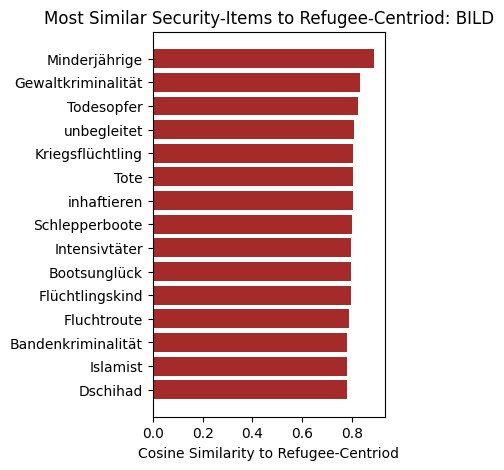

In [6]:
get_most_similar_topical_keywords(label="BILD", topic="security", topn=TOPN)

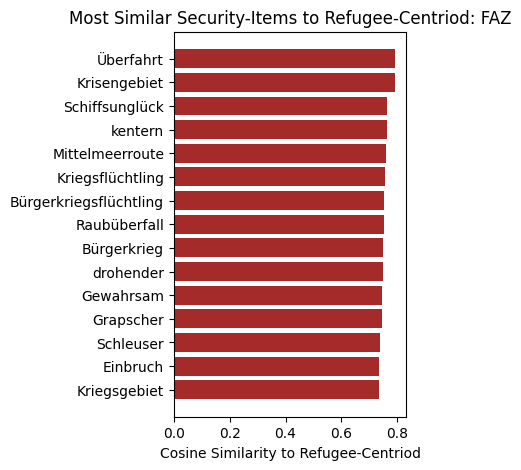

In [7]:
get_most_similar_topical_keywords(label="FAZ", topic="security", topn=TOPN)

## Policy:

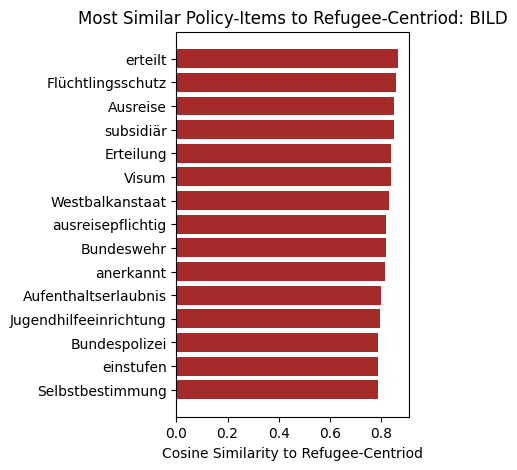

In [8]:
get_most_similar_topical_keywords(label="BILD", topic="policy", topn=TOPN)

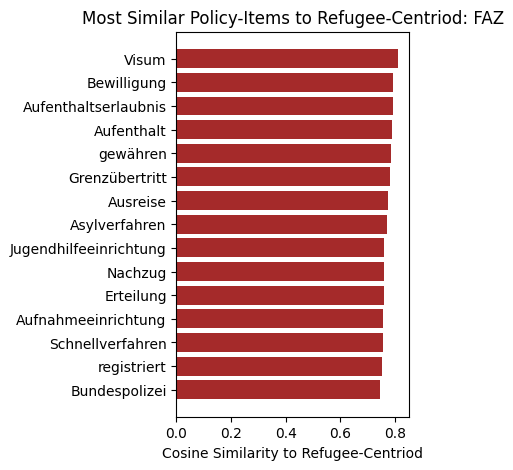

In [9]:
get_most_similar_topical_keywords(label="FAZ", topic="policy", topn=TOPN)